In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('display.max_rows', None) # 显示完整的行
pd.set_option('display.max_colwidth', 100)

In [3]:
'''
data = pd.read_parquet("B.parquet")
data[['cet_cest_timestamp',
      'DE_load_actual_entsoe_transparency','GB_UKM_load_actual_entsoe_transparency','FR_load_actual_entsoe_transparency','IT_load_actual_entsoe_transparency',
     'DE_wind_generation_actual','GB_UKM_wind_generation_actual','FR_wind_onshore_generation_actual','IT_wind_onshore_generation_actual',
     'DE_solar_generation_actual','GB_UKM_solar_generation_actual','FR_solar_generation_actual','IT_solar_generation_actual']].to_csv('four.csv',index=False)
'''
data = pd.read_csv("four.csv")

'\ndata = pd.read_parquet("B.parquet")\ndata[[\'cet_cest_timestamp\',\n      \'DE_load_actual_entsoe_transparency\',\'GB_UKM_load_actual_entsoe_transparency\',\'FR_load_actual_entsoe_transparency\',\'IT_load_actual_entsoe_transparency\',\n     \'DE_wind_generation_actual\',\'GB_UKM_wind_generation_actual\',\'FR_wind_onshore_generation_actual\',\'IT_wind_onshore_generation_actual\',\n     \'DE_solar_generation_actual\',\'GB_UKM_solar_generation_actual\',\'FR_solar_generation_actual\',\'IT_solar_generation_actual\']].to_csv(\'four.csv\',index=False)\n'

In [4]:
data.isna().sum()
data=data.fillna(method = "pad")
data.isna().sum()
data=data.fillna(method = "bfill")
data.isna().sum()

cet_cest_timestamp                           0
DE_load_actual_entsoe_transparency           1
GB_UKM_load_actual_entsoe_transparency     176
FR_load_actual_entsoe_transparency          44
IT_load_actual_entsoe_transparency           3
DE_wind_generation_actual                   75
GB_UKM_wind_generation_actual              129
FR_wind_onshore_generation_actual            8
IT_wind_onshore_generation_actual         8746
DE_solar_generation_actual                 104
GB_UKM_solar_generation_actual              55
FR_solar_generation_actual                  15
IT_solar_generation_actual                6600
dtype: int64

cet_cest_timestamp                           0
DE_load_actual_entsoe_transparency           1
GB_UKM_load_actual_entsoe_transparency       1
FR_load_actual_entsoe_transparency           2
IT_load_actual_entsoe_transparency           2
DE_wind_generation_actual                    1
GB_UKM_wind_generation_actual                2
FR_wind_onshore_generation_actual            2
IT_wind_onshore_generation_actual         7128
DE_solar_generation_actual                   8
GB_UKM_solar_generation_actual              10
FR_solar_generation_actual                   9
IT_solar_generation_actual                6583
dtype: int64

cet_cest_timestamp                        0
DE_load_actual_entsoe_transparency        0
GB_UKM_load_actual_entsoe_transparency    0
FR_load_actual_entsoe_transparency        0
IT_load_actual_entsoe_transparency        0
DE_wind_generation_actual                 0
GB_UKM_wind_generation_actual             0
FR_wind_onshore_generation_actual         0
IT_wind_onshore_generation_actual         0
DE_solar_generation_actual                0
GB_UKM_solar_generation_actual            0
FR_solar_generation_actual                0
IT_solar_generation_actual                0
dtype: int64

In [5]:
data.tail(5)

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,GB_UKM_load_actual_entsoe_transparency,FR_load_actual_entsoe_transparency,IT_load_actual_entsoe_transparency,DE_wind_generation_actual,GB_UKM_wind_generation_actual,FR_wind_onshore_generation_actual,IT_wind_onshore_generation_actual,DE_solar_generation_actual,GB_UKM_solar_generation_actual,FR_solar_generation_actual,IT_solar_generation_actual
50396,2020-09-30T21:00:00+0200,57559.0,38640.0,48210.0,35217.0,10654.0,7083.0,3632.0,515.0,0.0,142.0,142.0,2345.0
50397,2020-09-30T22:00:00+0200,54108.0,34913.0,48210.0,31537.0,11836.0,7431.0,3965.0,546.0,0.0,142.0,142.0,2345.0
50398,2020-09-30T23:00:00+0200,49845.0,30637.0,48058.0,28730.0,12168.0,7788.0,4201.0,519.0,0.0,142.0,143.0,2345.0
50399,2020-10-01T00:00:00+0200,46886.0,25362.0,44869.0,26269.0,12533.0,4627.0,4428.0,489.0,0.0,142.0,142.0,2345.0
50400,2020-10-01T01:00:00+0200,45461.0,22208.0,44869.0,26269.0,12798.0,7382.0,4428.0,489.0,0.0,142.0,142.0,2345.0


In [6]:
def sum_data(df, i, n):
    data = df.iloc[:, i]
    ls = []
    j = 0
    while j+n-1 < len(data):
        ls.append(data[j: j+n].sum(axis=0))
        j = j+n
    return pd.Series(ls)

In [7]:
index=pd.date_range(start='2015-01-01', end = '2020-9-30',freq = "W",name = "time")
data_day=pd.DataFrame([sum_data(data,i,7*24) for i in range(1,13) ]).T
data_day.index = index
data_day.columns=['DE_load_actual_entsoe_transparency','GB_UKM_load_actual_entsoe_transparency','FR_load_actual_entsoe_transparency','IT_load_actual_entsoe_transparency',
                  'DE_wind_generation_actual','GB_UKM_wind_generation_actual','FR_wind_onshore_generation_actual','IT_wind_onshore_generation_actual',
                  'DE_solar_generation_actual','GB_UKM_solar_generation_actual','FR_solar_generation_actual','IT_solar_generation_actual']

In [12]:
a=data_day.describe().round(0)
a.columns=['DE_load','GB_UKM_load','FR_load','IT_load',
                  'DE_wind','GB_UKM','FR_wind','IT_wind',
                  'DE_solar','GB_UKM_solar','FR_solar','IT_solar']
a.T
a.T.to_latex()

,count,mean,std,min,25%,50%,75%,max
DE_load,300.0,9322720.0,632180.0,7606589.0,8873762.0,9232235.0,9893328.0,10615559.0
GB_UKM_load,300.0,6024632.0,707406.0,4383687.0,5521369.0,5989524.0,6547590.0,7731714.0
FR_load,300.0,8946211.0,1686922.0,6677841.0,7581573.0,8190058.0,10353212.0,13833295.0
IT_load,300.0,5525223.0,522808.0,3781176.0,5251056.0,5581657.0,5844042.0,7084973.0
DE_wind,300.0,1941040.0,1046355.0,384722.0,1161218.0,1696890.0,2399503.0,5422745.0
GB_UKM,300.0,797453.0,326031.0,195828.0,555531.0,748424.0,1016426.0,1865012.0
FR_wind,300.0,494754.0,264891.0,160169.0,302618.0,408182.0,620905.0,1421572.0
IT_wind,300.0,297852.0,172591.0,37968.0,148961.0,289064.0,424828.0,794476.0
DE_solar,300.0,765529.0,452286.0,85288.0,301662.0,807149.0,1150790.0,1748022.0
GB_UKM_solar,300.0,198943.0,115671.0,14810.0,93286.0,203773.0,283161.0,518585.0


'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} &  count &       mean &        std &        min &        25\\% &        50\\% &         75\\% &         max \\\\\n\\midrule\nDE\\_load      &  300.0 &  9322720.0 &   632180.0 &  7606589.0 &  8873762.0 &  9232235.0 &   9893328.0 &  10615559.0 \\\\\nGB\\_UKM\\_load  &  300.0 &  6024632.0 &   707406.0 &  4383687.0 &  5521369.0 &  5989524.0 &   6547590.0 &   7731714.0 \\\\\nFR\\_load      &  300.0 &  8946211.0 &  1686922.0 &  6677841.0 &  7581573.0 &  8190058.0 &  10353212.0 &  13833295.0 \\\\\nIT\\_load      &  300.0 &  5525223.0 &   522808.0 &  3781176.0 &  5251056.0 &  5581657.0 &   5844042.0 &   7084973.0 \\\\\nDE\\_wind      &  300.0 &  1941040.0 &  1046355.0 &   384722.0 &  1161218.0 &  1696890.0 &   2399503.0 &   5422745.0 \\\\\nGB\\_UKM       &  300.0 &   797453.0 &   326031.0 &   195828.0 &   555531.0 &   748424.0 &   1016426.0 &   1865012.0 \\\\\nFR\\_wind      &  300.0 &   494754.0 &   264891.0 &   160169.0 &   302618.0 &   408182.0 & 

<Figure size 1800x1080 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0xc0763c8>,
 'caps': [<matplotlib.lines.Line2D at 0xc076d48>,
 'boxes': [<matplotlib.lines.Line2D at 0xc06dd88>,
 'medians': [<matplotlib.lines.Line2D at 0xc07c688>,
 'fliers': [<matplotlib.lines.Line2D at 0xc076dc8>,
 'means': []}

[Text(1, 0, 'DE_load'), Text(2, 0, 'DE_wind'), Text(3, 0, 'DE_solar')]

{'whiskers': [<matplotlib.lines.Line2D at 0xc2e67c8>,
 'caps': [<matplotlib.lines.Line2D at 0xc2e6f88>,
 'boxes': [<matplotlib.lines.Line2D at 0xc2e6148>,
 'medians': [<matplotlib.lines.Line2D at 0xc2eb988>,
 'fliers': [<matplotlib.lines.Line2D at 0xc2ebe48>,
 'means': []}

[Text(1, 0, 'GB_UKM_load'),
 Text(2, 0, 'GB_UKM_wind'),
 Text(3, 0, 'GB_UKM_solar')]

{'whiskers': [<matplotlib.lines.Line2D at 0xc363988>,
 'caps': [<matplotlib.lines.Line2D at 0xc3522c8>,
 'boxes': [<matplotlib.lines.Line2D at 0xc363308>,
 'medians': [<matplotlib.lines.Line2D at 0xc36ba08>,
 'fliers': [<matplotlib.lines.Line2D at 0xc36be88>,
 'means': []}

[Text(1, 0, 'FR_load'), Text(2, 0, 'FR_wind'), Text(3, 0, 'FR_solar')]

{'whiskers': [<matplotlib.lines.Line2D at 0xc3e5b08>,
 'caps': [<matplotlib.lines.Line2D at 0xc3ec108>,
 'boxes': [<matplotlib.lines.Line2D at 0xc3e5508>,
 'medians': [<matplotlib.lines.Line2D at 0xc3ecbc8>,
 'fliers': [<matplotlib.lines.Line2D at 0xc3eca88>,
 'means': []}

[Text(1, 0, 'IT_load'), Text(2, 0, 'IT_wind'), Text(3, 0, 'IT_solar')]

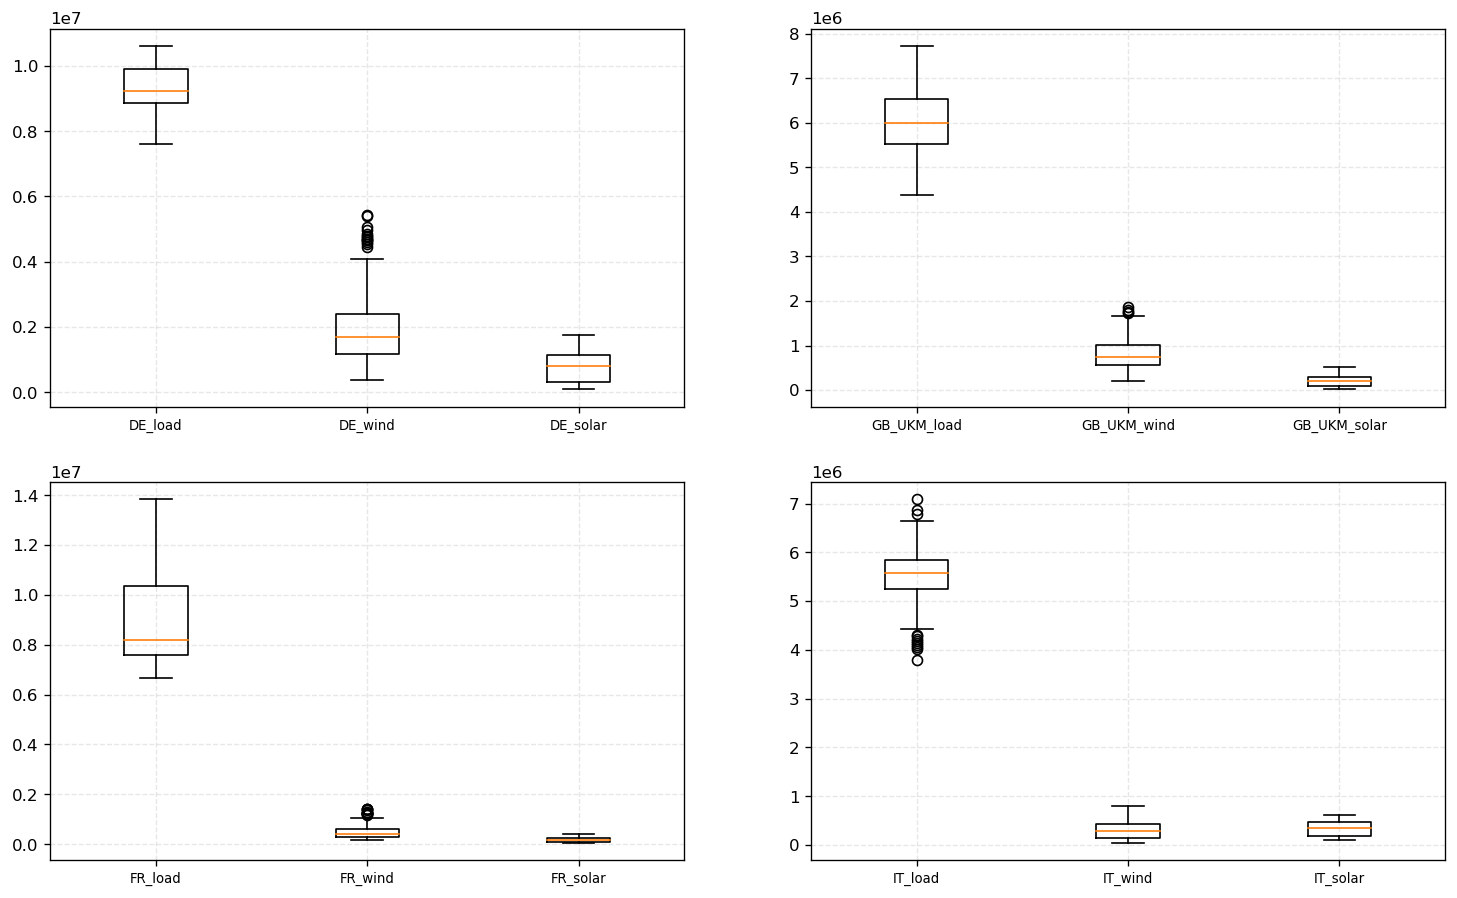

In [10]:
plt.figure(figsize=(15,9),dpi=120)

ax3=plt.subplot(221)
plt.boxplot(data_day[['DE_load_actual_entsoe_transparency','DE_wind_generation_actual','DE_solar_generation_actual']])
plt.grid(linestyle="--", alpha=0.3)
ax3.set_xticklabels(['DE_load','DE_wind','DE_solar'], fontsize=8)

ax1=plt.subplot(222)
plt.boxplot(data_day[['GB_UKM_load_actual_entsoe_transparency','GB_UKM_wind_generation_actual','GB_UKM_solar_generation_actual']])
plt.grid(linestyle="--", alpha=0.3)
ax1.set_xticklabels(['GB_UKM_load','GB_UKM_wind','GB_UKM_solar'], fontsize=8)


ax2=plt.subplot(223)
plt.boxplot(data_day[['FR_load_actual_entsoe_transparency','FR_wind_onshore_generation_actual','FR_solar_generation_actual']])
plt.grid(linestyle="--", alpha=0.3)
ax2.set_xticklabels(['FR_load','FR_wind','FR_solar'], fontsize=8)




ax4=plt.subplot(224) 
plt.boxplot(data_day[['IT_load_actual_entsoe_transparency','IT_wind_onshore_generation_actual','IT_solar_generation_actual']])
plt.grid(linestyle="--", alpha=0.3)
ax4.set_xticklabels(['IT_load','IT_wind','IT_solar'], fontsize=8)
          
          
plt.savefig(r".\7.png")
plt.show()

<Figure size 1200x720 with 0 Axes>

Text(0.5, 0, 'time(week)')

Text(0, 0.5, 'load(MW)')

<AxesSubplot:xlabel='time', ylabel='load(MW)'>

<AxesSubplot:xlabel='time', ylabel='load(MW)'>

<AxesSubplot:xlabel='time', ylabel='load(MW)'>

<AxesSubplot:xlabel='time', ylabel='load(MW)'>

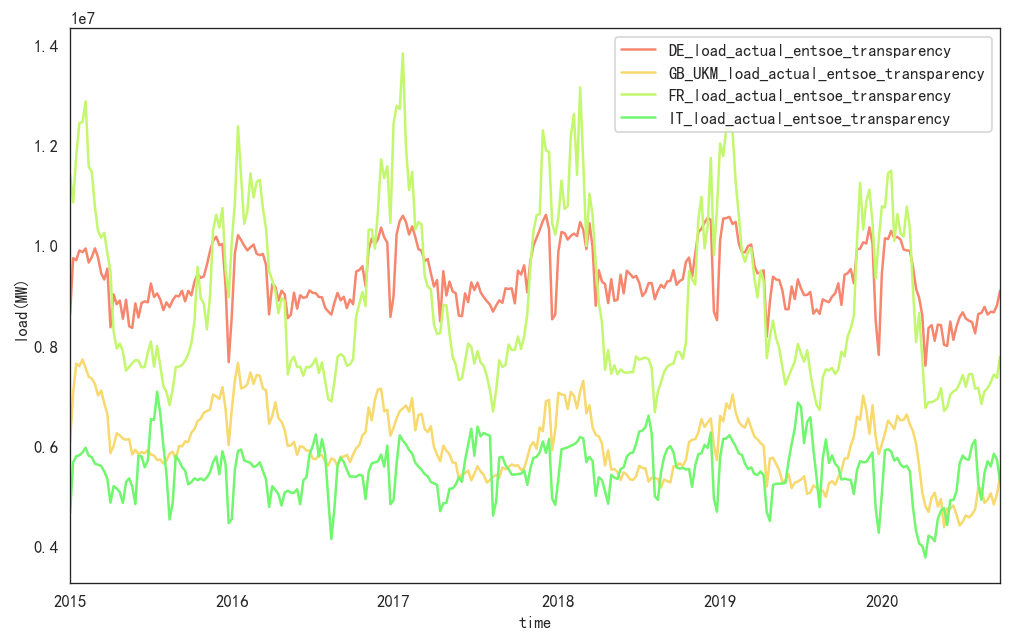

In [172]:
import seaborn as sns
sns.set_style("white")
j=1

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10, 6), dpi=120)
plt.xlabel('time(week)')
plt.ylabel('load(MW)')


data_day['DE_load_actual_entsoe_transparency'].plot(color=sns.hls_palette(50, l=.7, s=.9)[j])
j+=5
data_day['GB_UKM_load_actual_entsoe_transparency'].plot(color=sns.hls_palette(50, l=.7, s=.9)[j])
j+=5
data_day['FR_load_actual_entsoe_transparency'].plot(color=sns.hls_palette(50, l=.7, s=.9)[j])
j+=5
data_day['IT_load_actual_entsoe_transparency'].plot(color=sns.hls_palette(50, l=.7, s=.9)[j])
j+=5          
plt.legend()

plt.savefig(r".\images\1.png")

<Figure size 1200x720 with 0 Axes>

Text(0.5, 0, 'time(week)')

Text(0, 0.5, 'wind_generation(MW)')

<AxesSubplot:xlabel='time', ylabel='wind_generation(MW)'>

<AxesSubplot:xlabel='time', ylabel='wind_generation(MW)'>

<AxesSubplot:xlabel='time', ylabel='wind_generation(MW)'>

<AxesSubplot:xlabel='time', ylabel='wind_generation(MW)'>

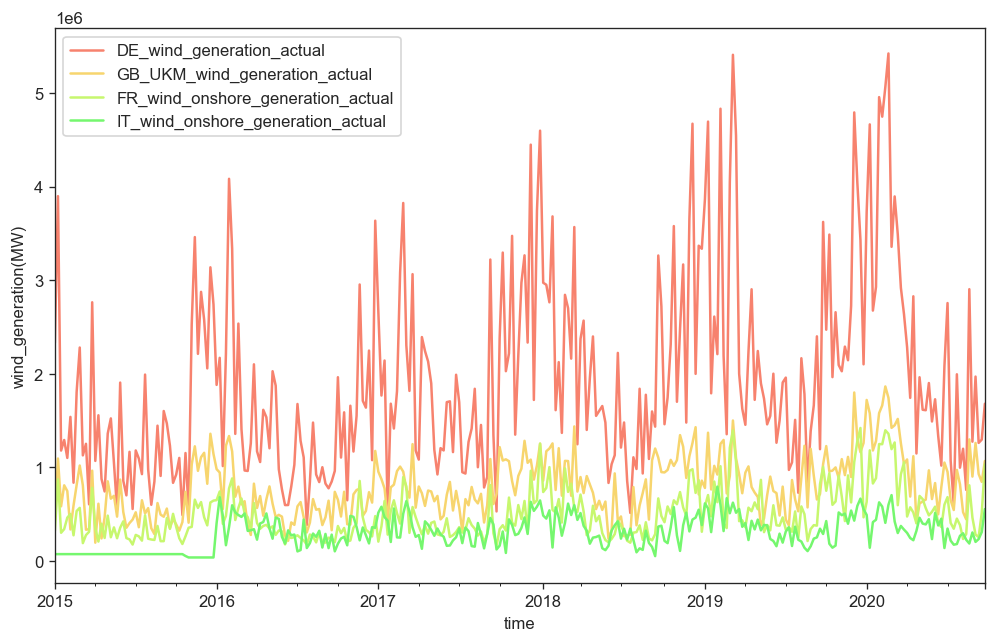

In [176]:
sns.set_style("ticks")

plt.figure(figsize=(10, 6), dpi=120)
plt.xlabel('time(week)')
plt.ylabel('wind_generation(MW)')

j=3
for i in['DE_wind_generation_actual','GB_UKM_wind_generation_actual','FR_wind_onshore_generation_actual','IT_wind_onshore_generation_actual']:
    data_day[i].plot(color=sns.hls_palette(200, l=.7, s=.9)[j])
    j+=20
    
plt.legend()

plt.savefig(r".\images\2.png")

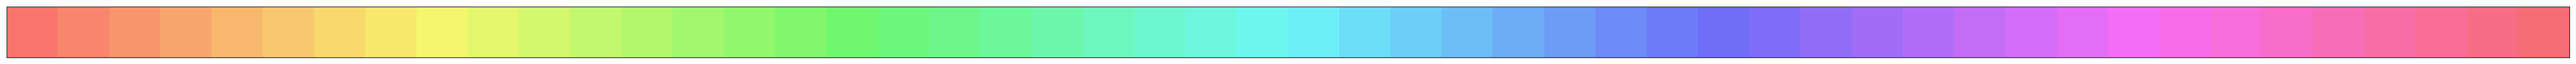

<Figure size 1200x720 with 0 Axes>

Text(0.5, 0, 'time(week)')

Text(0, 0.5, 'wind_generation(MW)')

<AxesSubplot:xlabel='time', ylabel='wind_generation(MW)'>

<AxesSubplot:xlabel='time', ylabel='wind_generation(MW)'>

<AxesSubplot:xlabel='time', ylabel='wind_generation(MW)'>

<AxesSubplot:xlabel='time', ylabel='wind_generation(MW)'>

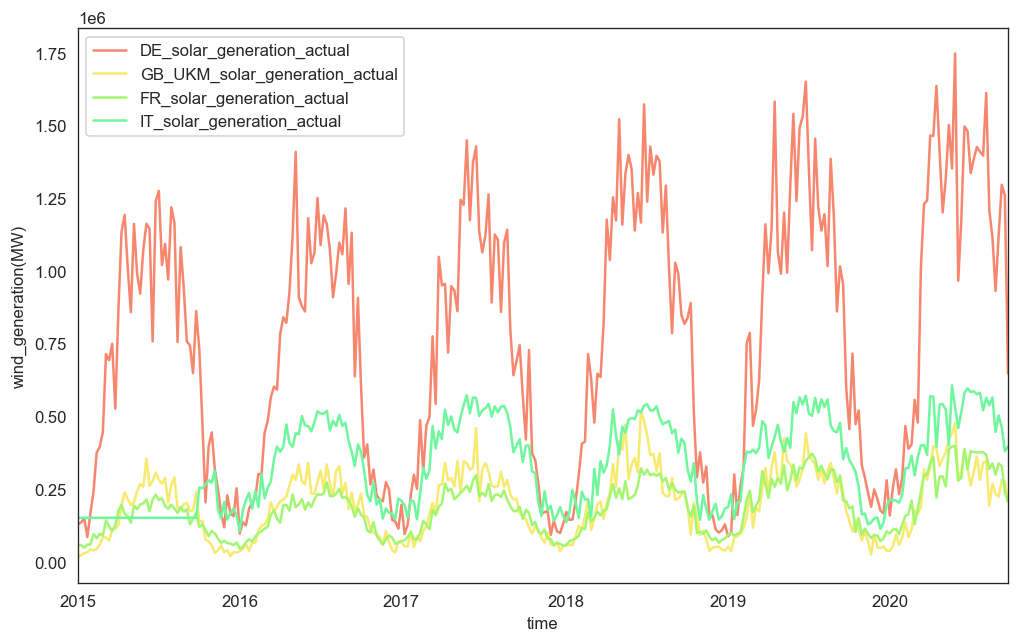

In [178]:
sns.set_style("white")

plt.figure(figsize=(10, 6), dpi=120)
plt.xlabel('time(week)')
plt.ylabel('wind_generation(MW)')

j=2
for i in['DE_solar_generation_actual','GB_UKM_solar_generation_actual','FR_solar_generation_actual','IT_solar_generation_actual']:
    data_day[i].plot(color=sns.hls_palette(100, l=.7, s=.9)[j])
    j+=12
    
plt.legend()

plt.savefig(r".\images\3.png")

<Figure size 1800x1080 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

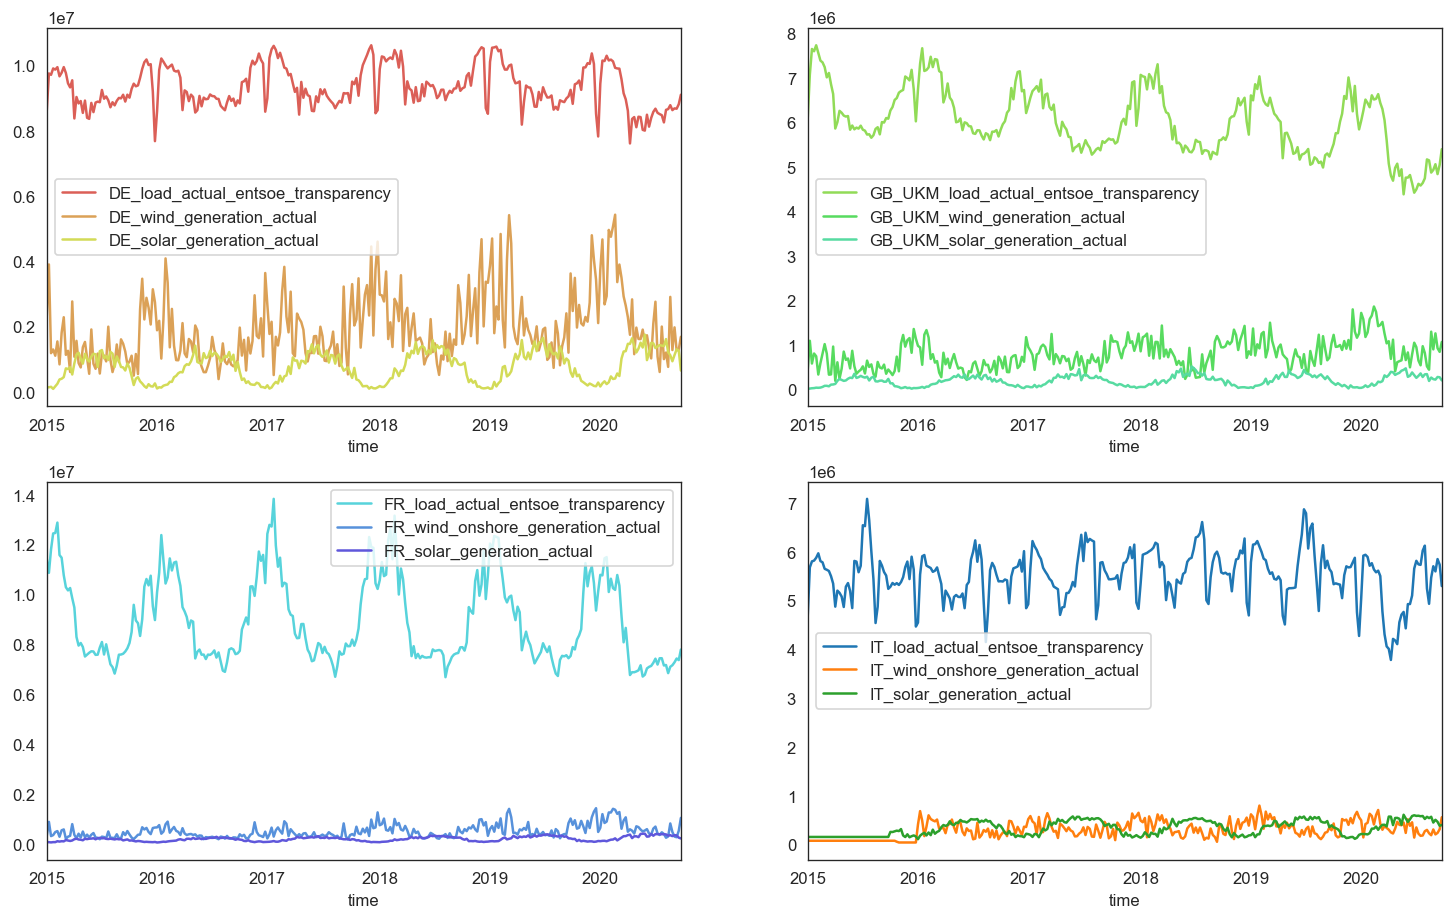

In [153]:
plt.figure(figsize=(15,9),dpi=120)

j=0
plt.subplot(221)
for i in['DE_load_actual_entsoe_transparency','DE_wind_generation_actual','DE_solar_generation_actual']:
    data_day[i].plot(color=sns.color_palette("hls",12)[j])
    j+=1
plt.legend()
    

plt.subplot(222)
for i in['GB_UKM_load_actual_entsoe_transparency','GB_UKM_wind_generation_actual','GB_UKM_solar_generation_actual']:
    data_day[i].plot(color=sns.color_palette("hls",12)[j])
    j+=1
plt.legend()

plt.subplot(223)
for i in['FR_load_actual_entsoe_transparency','FR_wind_onshore_generation_actual','FR_solar_generation_actual']:
    data_day[i].plot(color=sns.color_palette("hls",12)[j])
    j+=1
plt.legend()

plt.subplot(224) 
for i in['IT_load_actual_entsoe_transparency','IT_wind_onshore_generation_actual','IT_solar_generation_actual']:
    data_day[i].plot()
plt.legend()
plt.savefig(r".\images\4.png")
plt.show()



In [103]:
data_day.head(5)

,DE_load_actual_entsoe_transparency,GB_UKM_load_actual_entsoe_transparency,FR_load_actual_entsoe_transparency,IT_load_actual_entsoe_transparency,DE_wind_generation_actual,GB_UKM_wind_generation_actual,FR_wind_onshore_generation_actual,IT_wind_onshore_generation_actual,DE_solar_generation_actual,GB_UKM_solar_generation_actual,FR_solar_generation_actual,IT_solar_generation_actual
time,,,,,,,,,,,,
2015-01-04,8625678.0,6075965.0,11420034.0,4665911.0,2331483.0,434032.0,321726.0,73584.0,129166.0,14810.0,58576.0,151368.0
2015-01-11,9751449.0,7067690.0,10864819.0,5678577.0,3898159.0,1095022.0,872428.0,73584.0,135119.0,23101.0,57561.0,151368.0
2015-01-18,9709930.0,7648162.0,11803885.0,5802800.0,1180317.0,584409.0,301784.0,73584.0,149229.0,29197.0,48190.0,151368.0
2015-01-25,9904434.0,7596927.0,12444739.0,5818271.0,1293042.0,809021.0,341387.0,73584.0,85288.0,32488.0,59417.0,151368.0
2015-02-01,9869768.0,7731714.0,12463801.0,5876543.0,1101547.0,747235.0,463387.0,73584.0,165887.0,42011.0,59208.0,151368.0


<Figure size 1800x1080 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:xlabel='time'>

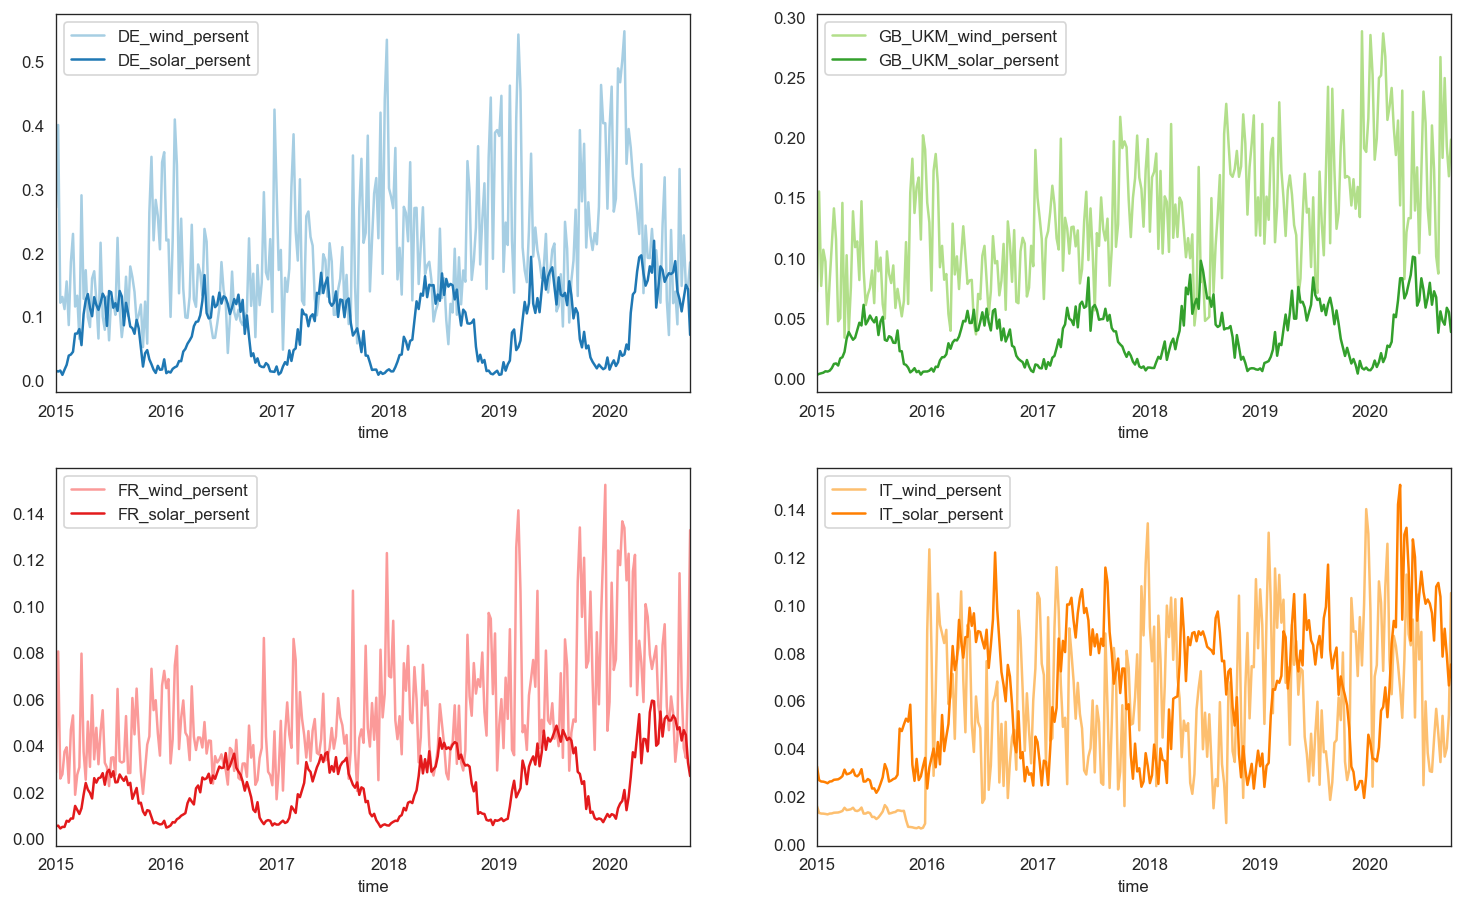

In [ ]:
plt.figure(figsize=(15,9),dpi=120)

plt.subplot(221)
(data_day['DE_wind_generation_actual']/data_day['DE_load_actual_entsoe_transparency']).plot(label='DE_wind_persent',color=sns.color_palette("Paired",8)[0])
(data_day['DE_solar_generation_actual']/data_day['DE_load_actual_entsoe_transparency']).plot(label='DE_solar_persent',color=sns.color_palette("Paired",8)[1])
plt.legend()

plt.subplot(222)
(data_day['GB_UKM_wind_generation_actual']/data_day['GB_UKM_load_actual_entsoe_transparency']).plot(label='GB_UKM_wind_persent',color=sns.color_palette("Paired",8)[2])
(data_day['GB_UKM_solar_generation_actual']/data_day['GB_UKM_load_actual_entsoe_transparency']).plot(label='GB_UKM_solar_persent',color=sns.color_palette("Paired",8)[3])
plt.legend()

plt.subplot(223)
(data_day['FR_wind_onshore_generation_actual']/data_day['FR_load_actual_entsoe_transparency']).plot(label='FR_wind_persent',color=sns.color_palette("Paired",8)[4])
(data_day['FR_solar_generation_actual']/data_day['FR_load_actual_entsoe_transparency']).plot(label='FR_solar_persent',color=sns.color_palette("Paired",8)[5])
plt.legend()

plt.subplot(224)
(data_day['IT_wind_onshore_generation_actual']/data_day['IT_load_actual_entsoe_transparency']).plot(label='IT_wind_persent',color=sns.color_palette("Paired",8)[6])
(data_day['IT_solar_generation_actual']/data_day['IT_load_actual_entsoe_transparency']).plot(label='IT_solar_persent',color=sns.color_palette("Paired",8)[7])
plt.legend()
plt.savefig(r".\images\5.png")


<Figure size 1800x1080 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

<AxesSubplot:>

<AxesSubplot:xlabel='time'>

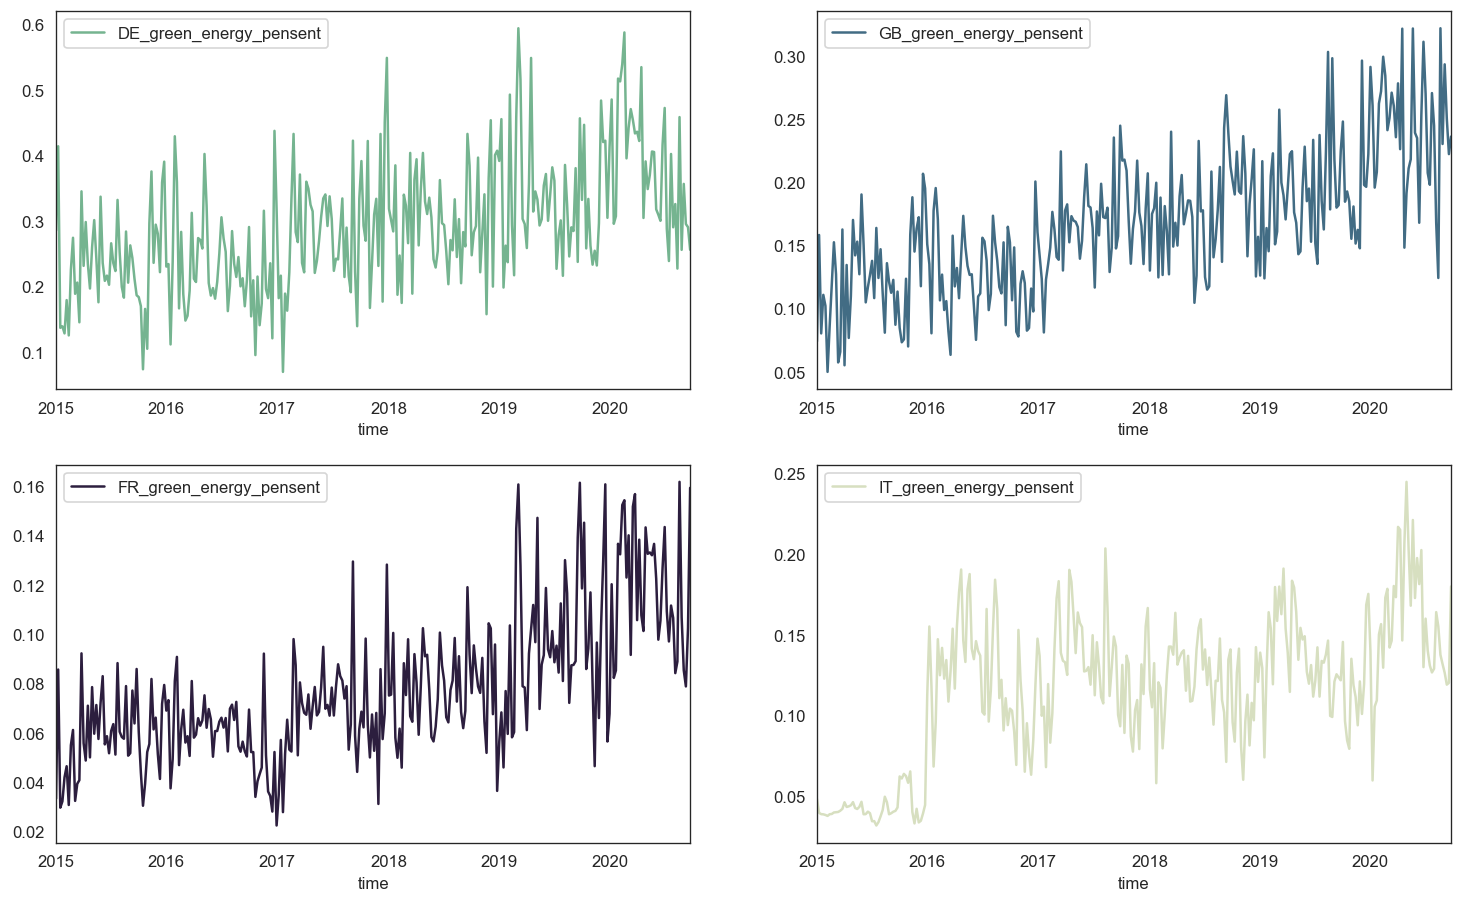

In [144]:
plt.figure(figsize=(15,9),dpi=120)

plt.subplot(221)
((data_day['DE_solar_generation_actual']+data_day['DE_wind_generation_actual'])/data_day['DE_load_actual_entsoe_transparency']).plot(label='DE_green_energy_pensent',color=sns.cubehelix_palette(4, start=.5, rot=-.75)[1])
plt.legend()
plt.subplot(222)
((data_day['GB_UKM_solar_generation_actual']+data_day['GB_UKM_wind_generation_actual'])/data_day['GB_UKM_load_actual_entsoe_transparency']).plot(label='GB_green_energy_pensent',color=sns.cubehelix_palette(4, start=.5, rot=-.75)[2])
plt.legend()
plt.subplot(223)
((data_day['FR_solar_generation_actual']+data_day['FR_wind_onshore_generation_actual'])/data_day['FR_load_actual_entsoe_transparency']).plot(label='FR_green_energy_pensent',color=sns.cubehelix_palette(4, start=.5, rot=-.75)[3])
plt.legend()
plt.subplot(224)
((data_day['IT_solar_generation_actual']+data_day['IT_wind_onshore_generation_actual'])/data_day['IT_load_actual_entsoe_transparency']).plot(label='IT_green_energy_pensent',color=sns.cubehelix_palette(4, start=.5, rot=-.75)[0])
plt.legend()

plt.savefig(r".\images\6.png")